<a href="https://colab.research.google.com/github/BrunoMarins/puc_data_science/blob/main/MVP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP1 – Análise de Dados e Boas Práticas
# Aluno: Bruno Marins Soares

## 1) Definição do problema
A partir de um *dataset*  com atributos que indicam tipo, contexto e "esforço de manutenção" de equipamentos industriais, analisaremos a possibilidade de agrupá-los por similaridade (*clustering*) com o intuito de realizar *benchmarking* de estratégias e estimar complexidade das instalações no que tange à manutenção. Por questões de confidencialidade, os dados foram encriptados. Atributos:

- **equip:** número de identificação do equipamento (número sequencial inteiro);
- **type1 a 5:** 5 indicadores de tipo de equipamento (textos estruturados e não estruturados encriptados para números inteiros);
- **context1 a 3:** 3 indicadores de contexto operacional do equipamento (textos estruturados encriptados para números inteiros);
- **effort1 a 14:** 14 tipos de "esforço de manutenção" quantificados e convertidos para uma mesma métrica (número decimal)


*Dataset* disponível em: https://github.com/BrunoMarins/puc_data_science/blob/main/equip_maint_encryp_data.csv

## 2) Análise de dados
### 2.1) Importação do *dataset*

In [1]:
# biblioteca Pandas
import pandas as pd

# url para importação do dataset
url = "https://raw.githubusercontent.com/BrunoMarins/puc_data_science/main/equip_maint_data.csv"

# leitura do arquivo CSV e armazenamento do dataframe em uma variável
df = pd.read_csv(url, sep=';', decimal=",")

# verificando que df é um dataframe
type(df)

pandas.core.frame.DataFrame

### 2.2) Estatísticas descritivas

In [2]:
# verificando informações de dimensão, quantidade de nulos e os tipos de dados em cada coluna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106339 entries, 0 to 106338
Data columns (total 23 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   equip     106339 non-null  int64  
 1   type1     106339 non-null  int64  
 2   type2     106339 non-null  int64  
 3   type3     106339 non-null  int64  
 4   type4     106339 non-null  int64  
 5   type5     106339 non-null  int64  
 6   context1  106339 non-null  int64  
 7   context2  106339 non-null  int64  
 8   context3  106339 non-null  int64  
 9   effort1   106339 non-null  float64
 10  effort2   106339 non-null  float64
 11  effort3   106339 non-null  float64
 12  effort4   106339 non-null  float64
 13  effort5   106339 non-null  float64
 14  effort6   106339 non-null  float64
 15  effort7   106339 non-null  float64
 16  effort8   106339 non-null  float64
 17  effort9   106339 non-null  float64
 18  effort10  106339 non-null  float64
 19  effort11  106339 non-null  float64
 20  effo

Não há *missings* (nulos) nos atributos *type* e *context*, pois estes já foram convertidos em um valor encriptado na construção do *dataset*.

In [3]:
# visualização das primeiras linhas
df.head()

,equip,type1,type2,type3,type4,type5,context1,context2,context3,effort1,...,effort5,effort6,effort7,effort8,effort9,effort10,effort11,effort12,effort13,effort14
0,1,1,1,2,2,1,2,1,2,0.000000,...,2.0,0.0,0.0,0.0,0.0,0.0,1900.0,2630.0,0.0,0.0
1,2,1,1,2,2,1,2,1,3,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,6053.0,17545.0,0.0,0.0
2,3,2,2,2,2,1,2,1,3,0.000000,...,0.0,0.0,0.0,0.0,200.0,0.0,2200.0,0.0,0.0,0.0
3,4,1,1,2,2,1,3,1,3,558.461538,...,0.0,0.0,0.0,0.0,600.0,0.0,3500.0,14480.0,0.0,0.0
4,5,1,1,2,2,1,3,1,3,1130.909091,...,0.0,0.0,0.0,0.0,300.0,450.0,12953.0,16800.0,0.0,0.0


In [4]:
# visualização das últimas linhas
df.tail()

,equip,type1,type2,type3,type4,type5,context1,context2,context3,effort1,...,effort5,effort6,effort7,effort8,effort9,effort10,effort11,effort12,effort13,effort14
106334,106335,673,9626,3,4,1,3,3,31,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
106335,106336,673,9626,3,4,1,3,3,31,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
106336,106337,673,9626,3,4,1,3,3,31,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
106337,106338,673,9626,3,4,1,3,3,31,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
106338,106339,673,9626,3,4,1,3,3,31,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# exibindo um sumário com a quantidade de valores distintos nos atributos qualitativos (categóricos nominais) encriptados para números inteiros
df.loc[:,'type1':'context3'].nunique(axis=0)

type1       1390
type2       9598
type3        130
type4         62
type5         43
context1       6
context2       3
context3      52
dtype: int64

Observa-se muitos valores distintos no atributo "type2" e em seguida no "type1".

In [6]:
# exibindo um sumário estatístico dos atributos quantitativos (effort)
df.loc[:,'effort1':].describe()

,effort1,effort2,effort3,effort4,effort5,effort6,effort7,effort8,effort9,effort10,effort11,effort12,effort13,effort14
count,106339.000000,106339.000000,106339.000000,106339.000000,106339.000000,106339.000000,1.063390e+05,106339.000000,106339.000000,106339.000000,1.063390e+05,106339.000000,106339.000000,106339.000000
mean,278.967454,194.519087,219.716990,9.815046,28.256925,4.213939,3.375721e+02,193.297375,154.009606,20.343455,2.951726e+02,332.045545,694.538685,125.265359
std,3029.556992,2445.621237,2400.205831,239.541875,383.875147,174.344406,5.118386e+03,3418.993355,3705.433593,369.787616,2.531742e+04,5058.320675,8508.432096,3858.312374
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,-55606.400000,-2805.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
max,507313.000000,531428.713300,288020.000000,57633.000000,52884.000000,34800.000000,1.275506e+06,977693.000000,818738.000000,48100.000000,8.203650e+06,321558.000000,672619.380000,482281.580000


Chama atenção que ao menos 75% dos menores valores de cada atributo de esforço ("effort1" a "effort14") sejam iguais a zero, do qual conclui-se que temos uma matriz bastante esparsa. Observou-se também valores negativos nos atributos "effort13" e "effort14" . Como valores negativos não são consistentes com atributos de "esforço de manutenção", serão substituídos por zero na etapa de pré-processamento.

### 2.3) Visualizações

In [7]:
# importando as bibliotecas gráficas Matplotlib e Seaborn
import matplotlib.pyplot as plt
import seaborn as sns

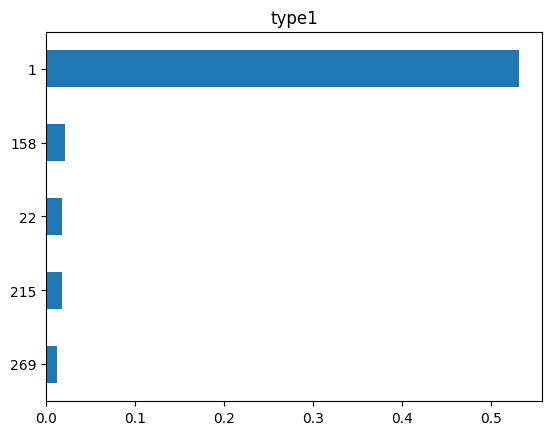

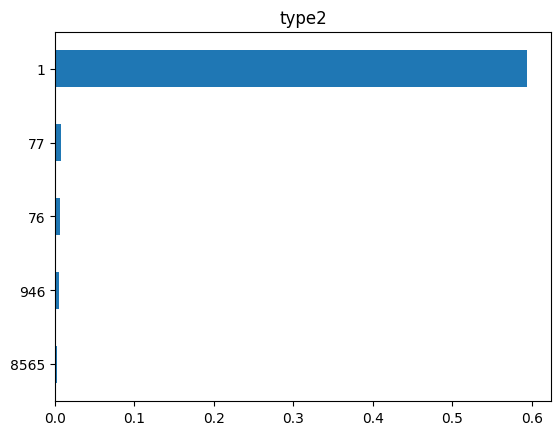

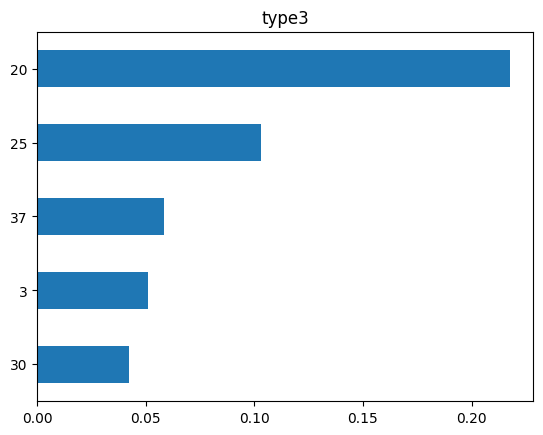

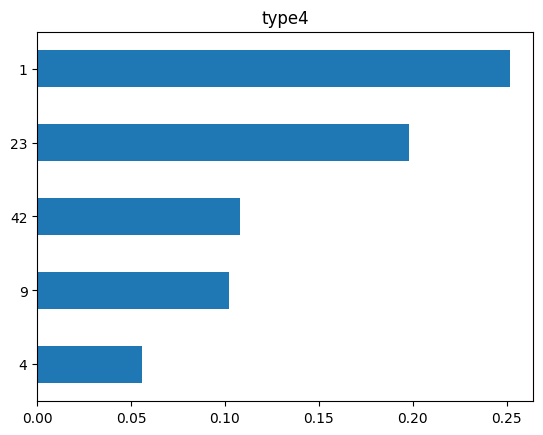

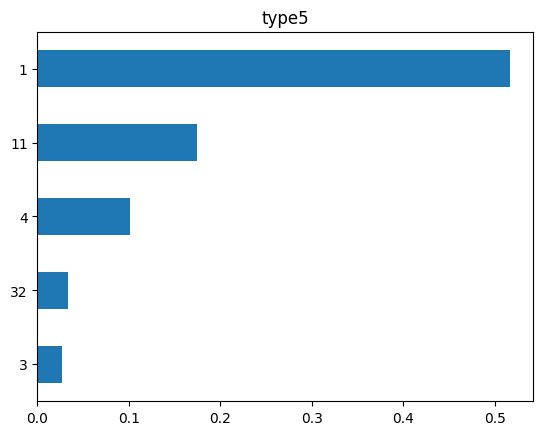

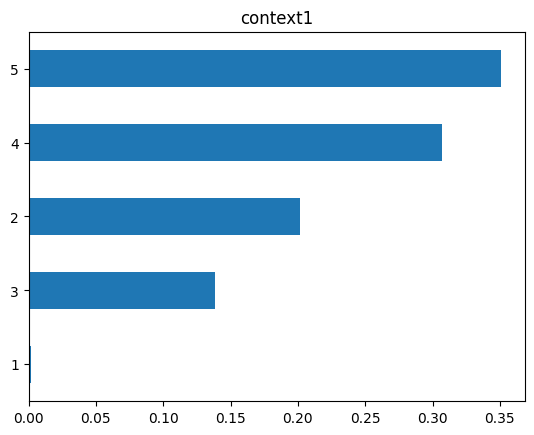

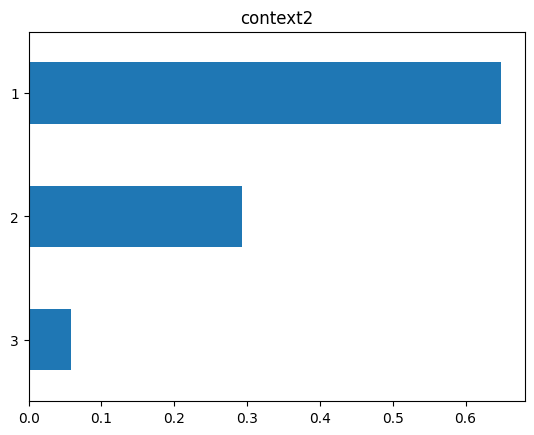

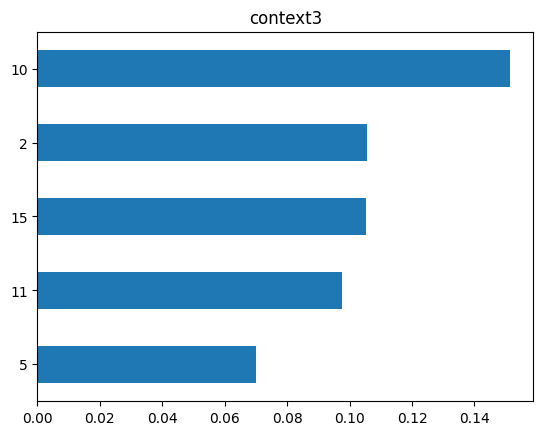

In [8]:
# avaliando as 5 categorias mais frequentes entre os atributos qualitativos
for i in list(df)[1:9]: 
 (df[i].value_counts() / len(df)).sort_values().tail().plot.barh(title=i)
 plt.show()

Os atributos *type1, 2, 4 e 5* apresentam distribuições de frequencia bastante assimétricas.

<Axes: >

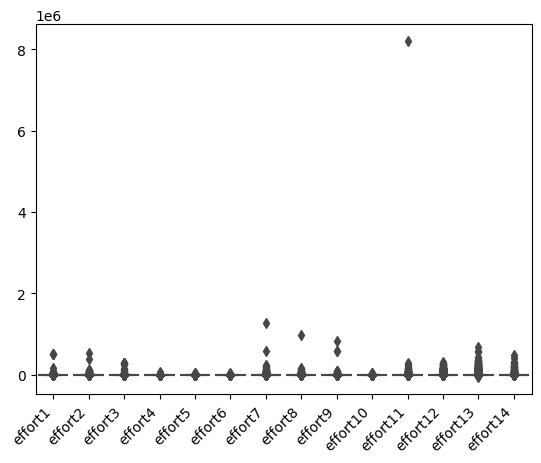

In [9]:
# boxplot dos atributos "effort"
plt.xticks(rotation=45, ha='right') # rotaciona rótulos do eixo horizontal
sns.boxplot(df.loc[:,'effort1':])

A quantidade de zeros nos atributos quantitativos, já observada na estatística descritiva, impede o formato tradicional do *boxplot*. Também nota-se valores bastante extremos.

<Axes: >

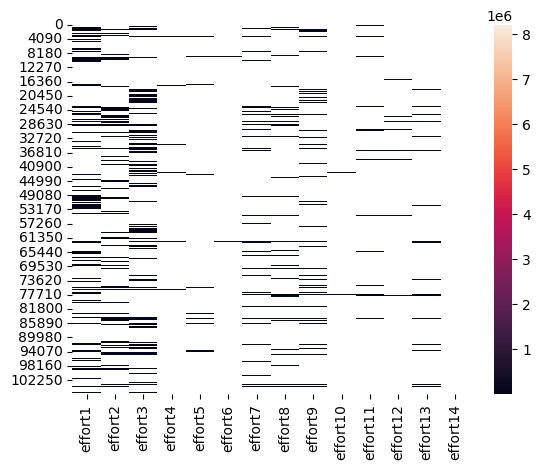

In [10]:
# mapa de calor dos valores maiores que zero dentre os atributos quantitativos ("effort")
sns.heatmap(df.loc[:,'effort1':].mask(df<=0))

Como há valores muito extremos (potencialmente *outliers*), o *heatmap* acaba servindo para observar o esparsamento (quantidade de zeros) dos atributos quantitativos analisados.

<Axes: >

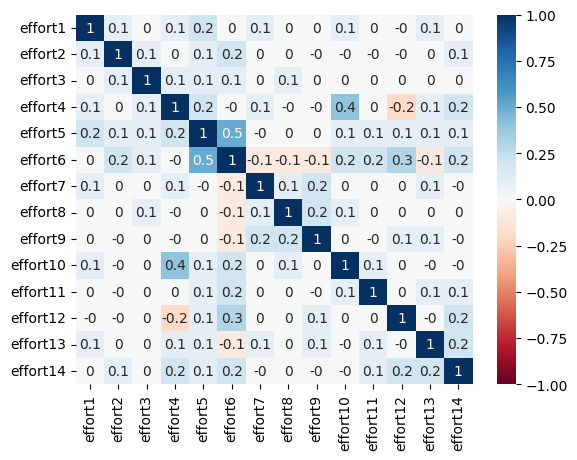

In [11]:
# gráfico de correlação entre atributos "effort"

sns.heatmap(df.loc[:,'effort1':].mask(df<=0).corr().round(1), annot=True, cmap='RdBu', vmin=-1, vmax=1)

Há baixa correlação entre os atributos quantitativos de maneira geral. A melhor correlação ocorre entre effort5 e 6 e entre effort4 e 10 e é esperada, conhecendo-se os atributos não encriptados.

<Axes: >

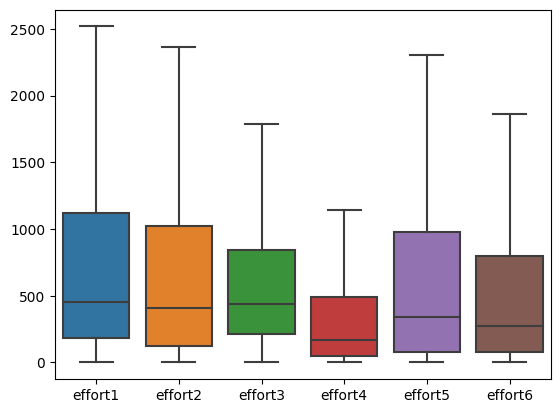

In [12]:
# boxplot dos atributos effort1 a 6 retirando valores <= 0 e possíveis outliers
sns.boxplot(df.loc[:,'effort1':'effort6'].mask(df<=0),showfliers=False)

<Axes: >

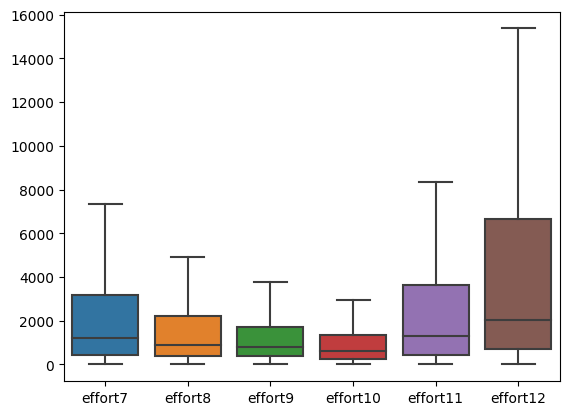

In [13]:
# boxplot dos atributos effort7 a 12 retirando valores <= 0 e possíveis outliers
sns.boxplot(df.loc[:,'effort7':'effort12'].mask(df<=0),showfliers=False)

<Axes: >

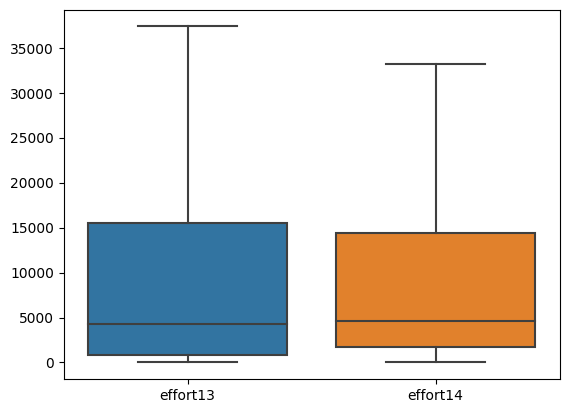

In [14]:
# boxplot dos atributos effort13 e 14 retirando valores <= 0 e possíveis outliers
sns.boxplot(df.loc[:,'effort13':'effort14'].mask(df<=0),showfliers=False)

Os limites ou *whiskers* (bigodes) dos *boxplot* dos atributos sem zeros e sem negativos aparentam ser um bom critério para seleção de *outliers* superiores.

## 3) Pré-processamento de dados
### 3.1) Limpeza e tratamento
Conforme observado na etapa de exploração, não há *missings* (nulos) explícitos (pois foram categorizados dentre os atributos qualitativos no processo de encriptação), porém dentre os atributos quantitativos há valores negativos (inválidos), muitos zeros e outros extremos que destoam da distribuição da maioria dos dados. Após inspecionar os elementos que ultrapassam os *whiskers*/limites superiores dos *boxplot* de cada atributo quantitativo ignorando-se zeros e negativos, concluímos que o melhor tratamento é substituí-los por zero, assim como para os valores negativos.

In [15]:
# substituindo por zero os negativos e os outliers (ignorando <= 0) de cada atributo quantitativo
q75 = df.loc[:,'effort1':'effort14'].mask(df<=0).quantile(0.75) # série com percentil 75% de cada atributo
q25 = df.loc[:,'effort1':'effort14'].mask(df<=0).quantile(0.25) # série com percentil 25% de cada atributo
iqr = q75-q25 # série com interquartile range, ou seja, comprimento da caixa de cada atributo
upper = q75 + iqr*1.5 # calculando whisker (bigode) superior
df_clean = df.mask(df<0)  # retirando negativos e gerando um novo dataframe
for i in list(df.loc[:,'effort1':'effort14'].columns):
  df_clean[i].mask(df_clean[i]> upper[i], 0, inplace=True)  # substitui outliers por zero no novo dataframe

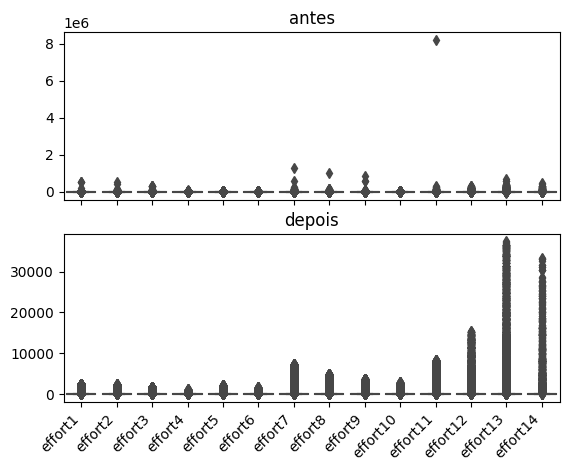

In [16]:
# gerando visualização linear de dispersão dos dados antes e depois
fig, axs = plt.subplots(2,1, sharex=True)
sns.boxplot(data=df.loc[:,'effort1':], ax=axs[0]).set(title = 'antes')
sns.boxplot(data=df_clean.loc[:,'effort1':], ax=axs[1]).set(title='depois')
plt.xticks(rotation=45, ha='right') # rotaciona rótulos do eixo horizontal
plt.show()

Notamos menos valores extremos e menor dispersão dos dados após tratamento. Alguns atributos talvez possam ser agregados, porém, pelo risco de perda de detalhes, voltaremos posteriormente a essa possibilidade caso detectemos a necessidade.

### 3.2) Transformação Numérica
A princípio, não parece interessante usar *one-hot / dummy encoding* nos atributos qualitativos uma vez que, pelas muitas categorias, isso aumenta consideravelmente a dimensão do *dataset*, que já é grande. Além disso, estes atributos, apesar de nominais, já estão codificados para números inteiros. Pela característica dos dados quantitativos, avaliamos que o método de normalização seja adequado, pois "comprime" os valores a um intervalo computacionalmente prático. Já a padronização não respeitaria a distribuição não normal destes atributos. A discretização pode ser interessante para redução da dimensionalidade caso optemos, num segundo momento, por dispensar as instâncias com atributos quantitativos nulos.

In [17]:
# normalizando os atributos quantitativos
from sklearn.preprocessing import MinMaxScaler # normalização
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df_clean.loc[:,'effort1':'effort14'])
df_scaled = pd.DataFrame(scaled)
df_scaled.columns = list(df_clean.loc[:,'effort1':'effort14'].columns)

# reconstruindo o dataframe
df_transf = df_clean.copy()
df_transf.loc[:,'effort1':'effort14'] = df_scaled
df_transf.describe()

,equip,type1,type2,type3,type4,type5,context1,context2,context3,effort1,...,effort5,effort6,effort7,effort8,effort9,effort10,effort11,effort12,effort13,effort14
count,106339.000000,106339.000000,106339.000000,106339.000000,106339.000000,106339.000000,106339.000000,106339.000000,106339.000000,106339.000000,...,106339.000000,106339.000000,106339.000000,106339.000000,106339.000000,106339.000000,106339.000000,106339.000000,106321.000000,106336.000000
mean,53170.000000,142.477680,1658.770084,32.874919,20.429899,7.704229,3.803036,1.410263,11.607378,0.049327,...,0.005918,0.000976,0.017273,0.018464,0.018509,0.003522,0.009225,0.005245,0.007134,0.001279
std,30697.569475,257.649709,2717.038067,22.029346,17.840966,10.537089,1.129678,0.599630,8.918966,0.141423,...,0.052025,0.021870,0.086535,0.090279,0.090013,0.039422,0.063946,0.047780,0.058408,0.023572
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26585.500000,1.000000,1.000000,20.000000,1.000000,1.000000,3.000000,1.000000,5.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,53170.000000,1.000000,1.000000,25.000000,23.000000,1.000000,4.000000,1.000000,10.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,79754.500000,194.000000,2651.000000,42.000000,39.000000,11.000000,5.000000,2.000000,15.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,106339.000000,1390.000000,9626.000000,130.000000,62.000000,43.000000,6.000000,3.000000,52.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 3.3) Reanálise
A seguir somamos os atributos quantitativos agregando-os em um único para facilitar uma visualização final em *pairplots*. Obviamente usamos o *dataframe* antes da normalização. Lembrando que os valores iniciais dos atributos *effort* foram convertidos na construção do *dataset* em uma mesma unidade métrica, permitindo assim a soma.

In [18]:
# somando os atributos effort e agregando em um total_effort para a visualização dos pairplots não ficar pesada e extensa
total_effort = df_clean.loc[:,'effort1':'effort14'].sum(axis=1).rename('total_effort')

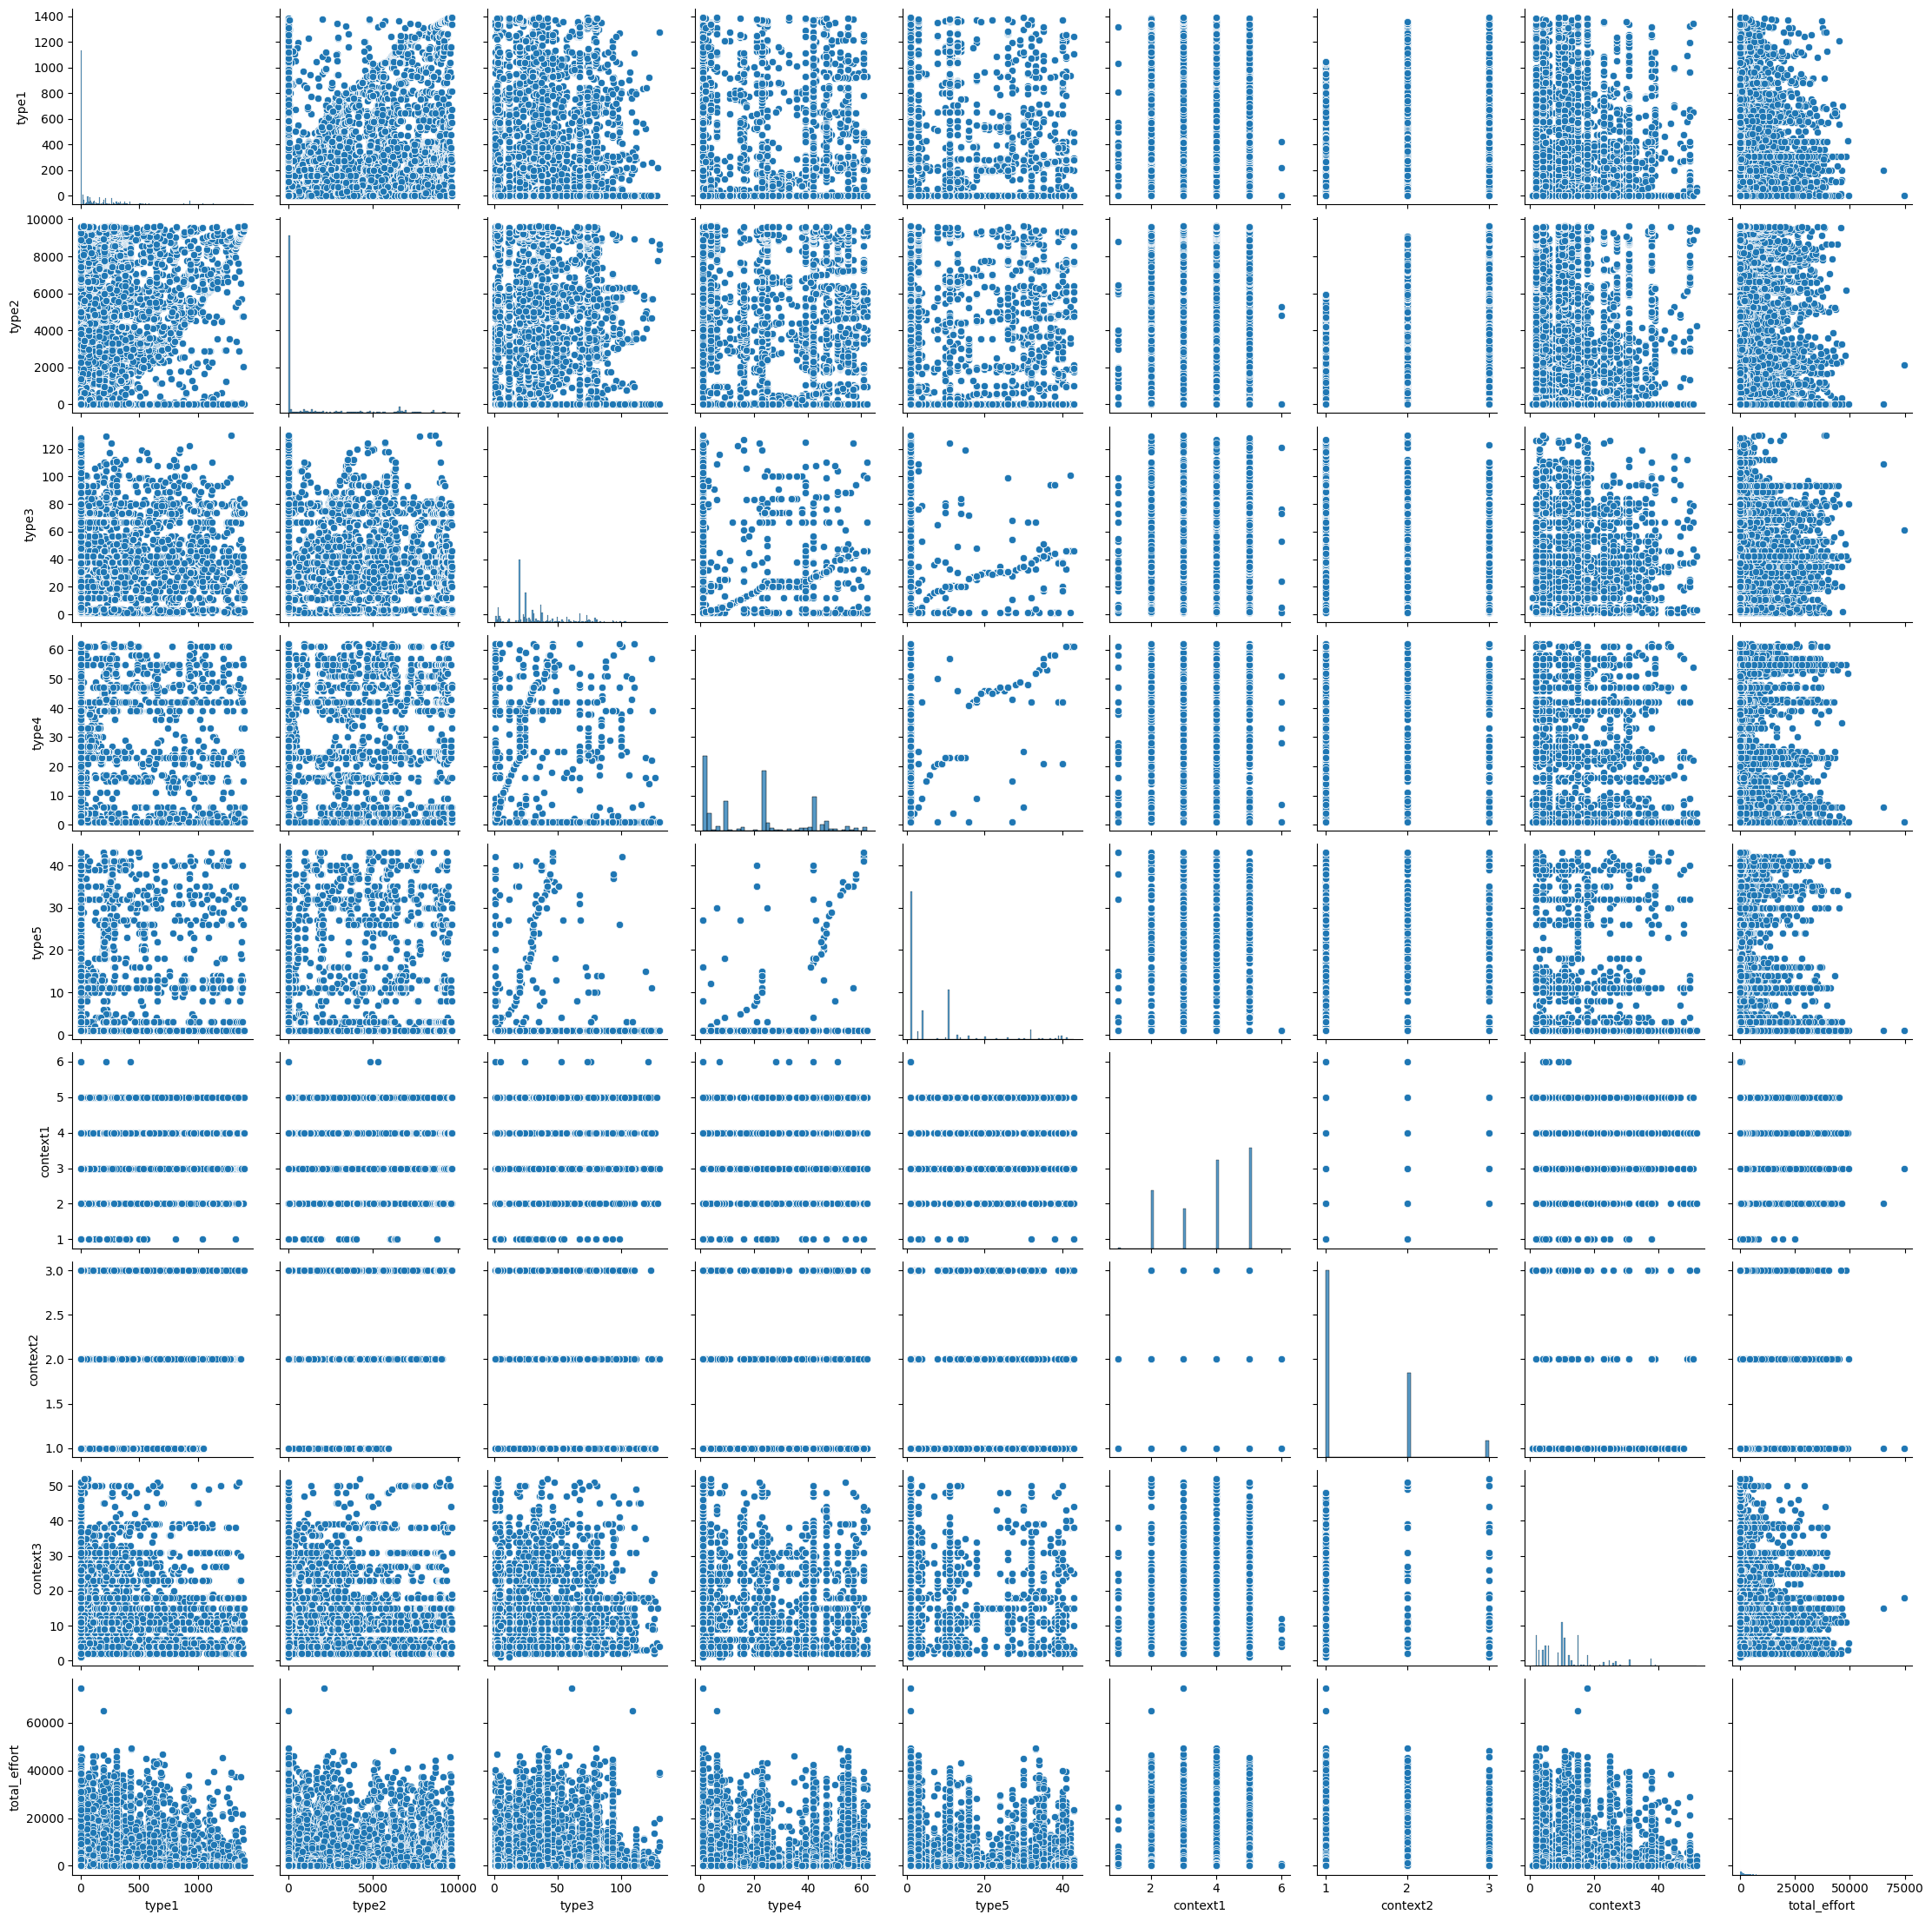

In [19]:
# pairplots - gráfico composto por scatter plots (dispersão) entre pares de atributos
sns.pairplot(pd.concat([df_clean.loc[:,'type1':'context3'],total_effort],axis=1))

A visualização em *pairplots* é bastante útil para obter *insights* iniciais sobre o relacionamento entre os atributos. Tanto que, numa inspeção inicial, observou-se que os atributos *type4 e 5* estavam com uma distribuição inesperada em relação a *context2* e percebeu-se que os dados ficaram incompletos na construção do *dataset*. O *dataset* já foi corrigido e substituído na fonte deste *notebook* que foi reexecutado.